#**PREDICCION DEL VALOR DE LA MONEDA INTERNACIONAL**
<img src="https://media.giphy.com/media/vLPrnuVyOZ1YjuOtYA/giphy-downsized-large.gif" alt="myGif" width="800px" height="300" />

Las monedas internacionales tienen un valor crucial en el comercio y las finanzas internacionales, ya que permiten a las personas y las empresas hacer transacciones en diferentes países. Cada moneda tiene un valor específico en relación con otras monedas y estos valores cambian constantemente debido a una variedad de factores económicos, políticos y de mercado. El valor de una moneda es determinado por la oferta y la demanda de la misma. Cuanto más demanda haya por una moneda, más valiosa será. Por otro lado, cuanto más disponible esté una moneda, menos valiosa será. Además, otros factores como la estabilidad política y económica de un país, la inflación y la tasa de interés también pueden influir en el valor de su moneda.

El proyecto se centrará en el análisis de los valores históricos de el dolar estadounidense (y la posibilidad de realizarlo con el euro tambien) en relación con el peso colombiano. Con la ayuda de algoritmos de regresión, se buscará entender la relación entre estas monedas y el peso colombiano y, a partir de esta comprensión, se intentará predecir el valor futuro de estas monedas. Será útil para las empresas que realizan transacciones internacionales, ya que les permitirá tomar decisiones informadas sobre cuándo es el momento adecuado para realizar transacciones en diferentes monedas.


In [ ]:
#@title **Librerías**

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
from google.colab import drive
sns.set_theme()
pd.__version__
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
#@title **Montando el drive** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/ProyectoIA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/ProyectoIA


In [ ]:
#@title **Cargando Dataset** { display-mode: "form" }

#Data creado con dataset original
data_2 = pd.read_csv('/content/drive/My Drive/ProyectoIA/Data/TRM.csv',encoding='cp1252' , sep=";") 

,VALOR,VIGENCIADESDE,VIGENCIAHASTA
0,643.42,"lunes, 2 de diciembre de 1991","lunes, 2 de diciembre de 1991"
1,639.22,"martes, 3 de diciembre de 1991","martes, 3 de diciembre de 1991"
2,635.70,"miŽrcoles, 4 de diciembre de 1991","miŽrcoles, 4 de diciembre de 1991"
3,631.51,"jueves, 5 de diciembre de 1991","jueves, 5 de diciembre de 1991"
4,627.16,"viernes, 6 de diciembre de 1991","viernes, 6 de diciembre de 1991"
5,638.06,"s‡bado, 7 de diciembre de 1991","lunes, 9 de diciembre de 1991"
6,622.92,"martes, 10 de diciembre de 1991","martes, 10 de diciembre de 1991"
7,627.46,"miŽrcoles, 11 de diciembre de 1991","miŽrcoles, 11 de diciembre de 1991"
8,633.09,"jueves, 12 de diciembre de 1991","jueves, 12 de diciembre de 1991"
9,632.35,"viernes, 13 de diciembre de 1991","viernes, 13 de diciembre de 1991"


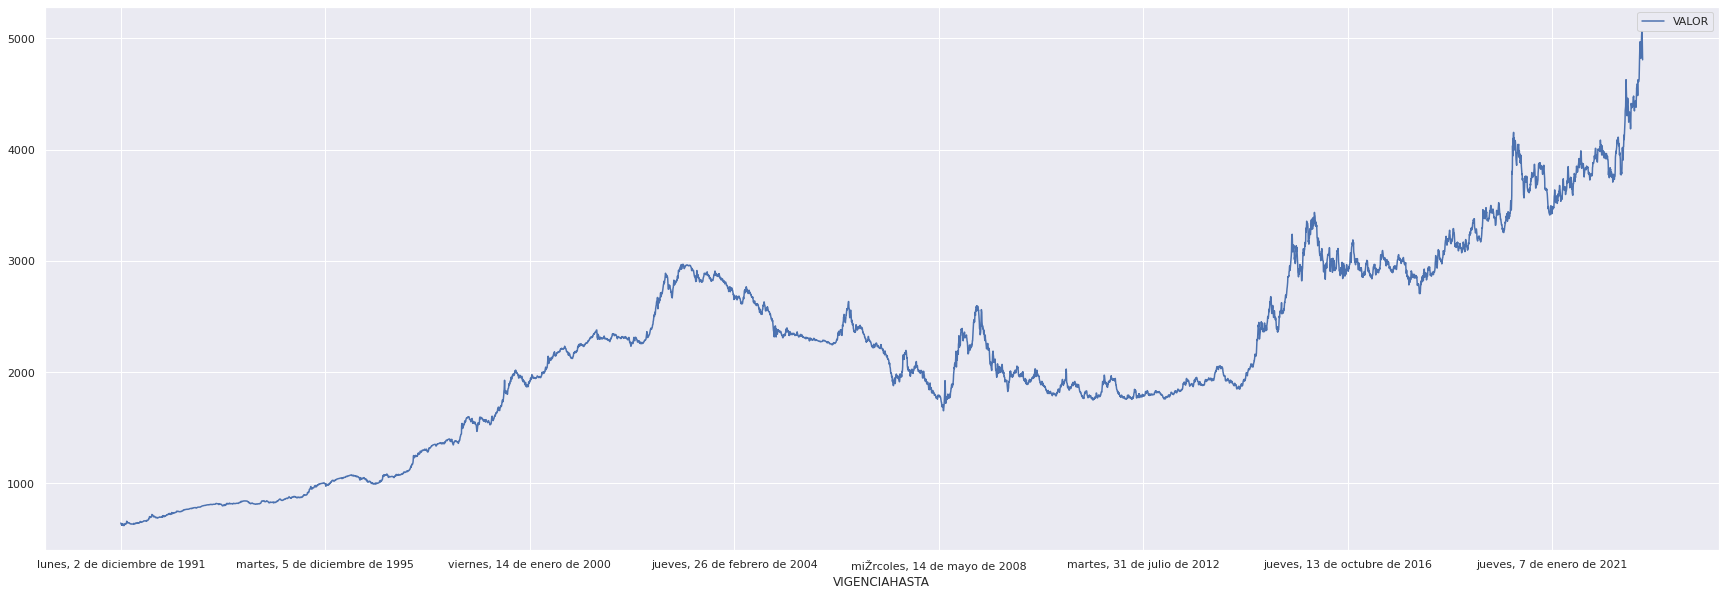

In [ ]:
#@title **Visualizando algunos datos y graficandolos**
data_2.plot(x="VIGENCIAHASTA", y="VALOR",figsize=(30, 10)) #Ploteando data

pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False
display(data_2.head(10))

## **Selección de Datos**

In [ ]:
#@title **Algoritmo para seleccionar 5 valores anteriores y predecir el 6to**
lista = np.array(data_2["VALOR"])#Usaremos solo la columna de VALOR de nuestro Dataset
sublists = []
y_count = []
for i in range(lista.size-3*5):
  sublist = []
  y= []
  
  for j in range(5):
    sublist.append(lista[i +j])
    
  
  sublists.append(np.array(sublist))
  y.append(lista[i+5])
  y_count.append(y)

In [ ]:
#@title **Algoritmo para seleccionar 3 valores anteriores y predecir el 4to**
lista_2 = np.array(data_2["VALOR"])#Usaremos solo la columna de VALOR de nuestro Dataset
sublists_2 = []
y_count_2 = []
for i in range(lista_2.size-3*3):
  sublist_2 = []
  y_2= []
  
  for j in range(3):
    sublist_2.append(lista_2[i +j])
    
  
  sublists_2.append(np.array(sublist_2))
  y_2.append(lista_2[i+3])
  y_count_2.append(y_2)

In [ ]:
#@title **Creación funcion de predicción para regresiones**
def prediccion_regresion(lista,regresor):
  predicciones = [] #Creamos una lista de Predicciones
  valor_real = [] #Creamos una lista de Valores reales
  for i in range(lista.size-3*5): #Así recorreremos nuestros valores
   prediction = np.float64(regresor.predict([[lista[i],lista[i+1] , lista[i+2], 	lista[i+3]	 ,lista[i+4]]])) #Estableceremos 5 valores históricos y realizaremos la predicción
   predicciones.append(prediction) #Guardamos las predicciones
   valor_real.append(lista[i+5]) #Guardamos nuestros valores reales
  return predicciones, valor_real 

# **Modelos de Regresion**

 ### 1. Decision Tree Regressor

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados
x = np.array(sublists) #Definimos nuestras características
regressor_TRM = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(x, y_count, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones, valor_real = prediccion_regresion(lista, regresor) #Usaremos la función de predicción para predecir nuestros valores

In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  651.092
RMSE depth split data  25.517
MAE depth split data  15.129


In [ ]:
#@title Lista obtenida de la predicción con Decision Tree
list_of_tuples = list(zip(valor_real, predicciones))
df = pd.DataFrame(list_of_tuples, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df

,Valor Real,Predicción
0,638.06,633.55
1,622.92,622.92
2,627.46,627.46
3,633.09,633.55
4,632.35,632.35
...,...,...
7424,4885.50,4885.50
7425,4913.24,4913.24
7426,4968.94,4968.94
7427,4948.14,4968.94


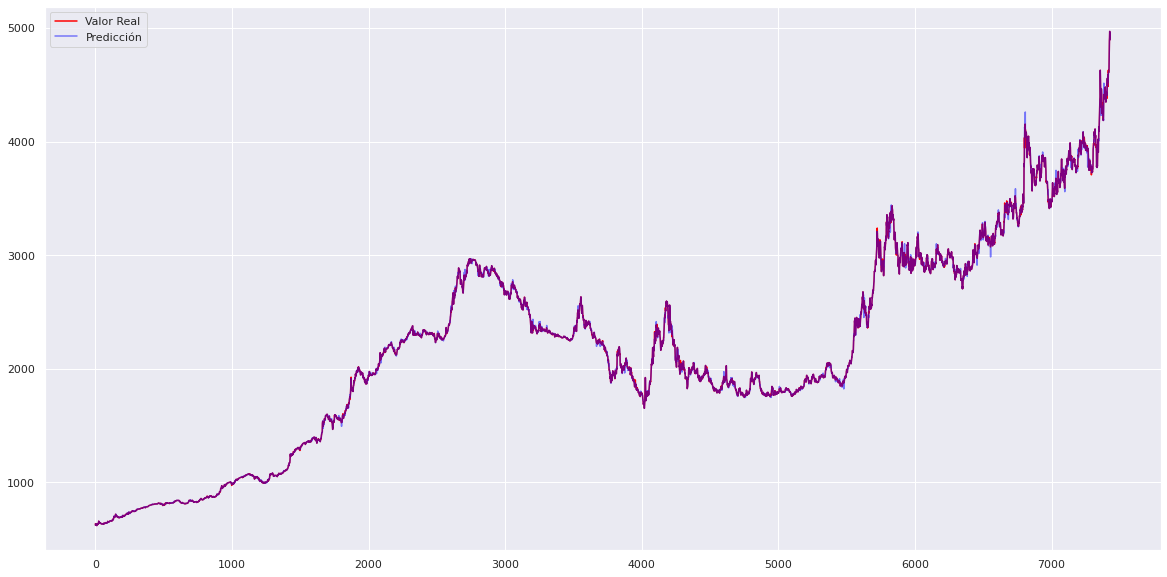

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando Decision Tree
x = df['Valor Real']
y = df['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

 ### 2. Random Forest Regressor

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados
x = np.array(sublists) #Definimos nuestras características
regressor_TRM = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(x, y_count, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones2, valor_real2 = prediccion_regresion(lista, regresor) #Usaremos la función de predicción para predecir nuestros valores


<ipython-input-16-1c78d81007fc>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data


In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  356.695
RMSE depth split data  18.886
MAE depth split data  11.319


In [ ]:
#@title Lista obtenida de la predicción con Random Forest
list_of_tuples_2 = list(zip(valor_real2, predicciones2))
df_2 = pd.DataFrame(list_of_tuples_2, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df_2

,Valor Real,Predicción
0,638.06,632.9175
1,622.92,628.7280
2,627.46,629.4085
3,633.09,629.2799
4,632.35,630.7266
...,...,...
7424,4885.50,4853.7819
7425,4913.24,4902.6984
7426,4968.94,4942.1979
7427,4948.14,4914.5786


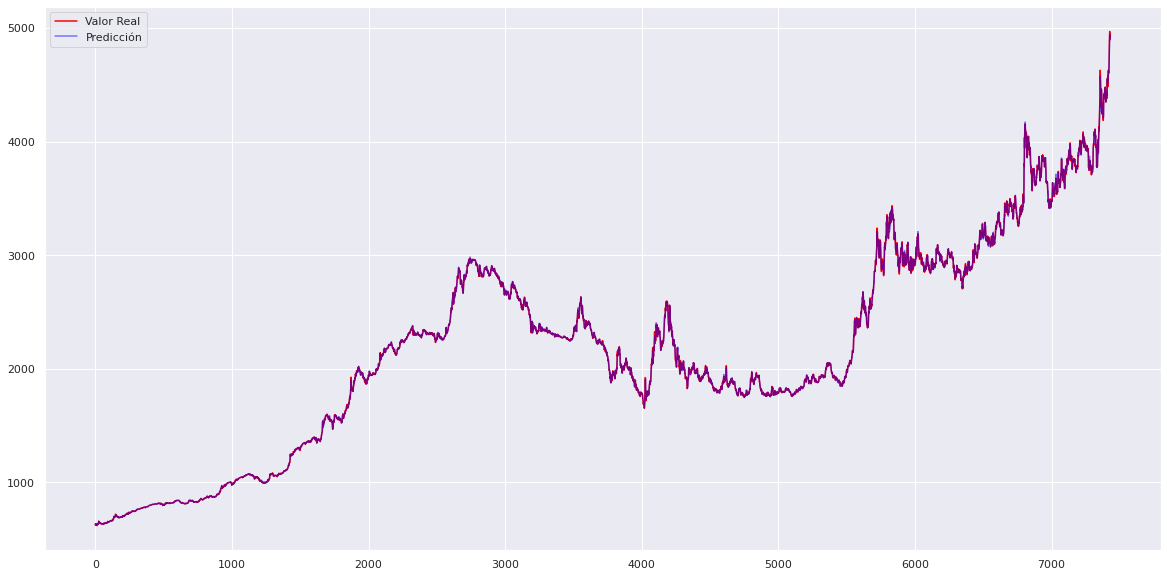

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando Random Forest
x = df_2['Valor Real']
y = df_2['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

 ### 3. Super Vector Regressor

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados
x = np.array(sublists) #Definimos nuestras características
regressor_TRM = SVR()
X_train, X_test, y_train, y_test = train_test_split(x, y_count, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones3, valor_real3 = prediccion_regresion(lista, regresor) #Usaremos la función de predicción para predecir nuestros valores


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  99871.096
RMSE depth split data  316.024
MAE depth split data  143.616


In [ ]:
#@title Lista obtenida de la predicción con SVR
list_of_tuples_3 = list(zip(valor_real3, predicciones3))
df_3 = pd.DataFrame(list_of_tuples_3, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df_3

,Valor Real,Predicción
0,638.06,1153.077516
1,622.92,1153.661049
2,627.46,1155.463318
3,633.09,1156.376151
4,632.35,1156.209526
...,...,...
7424,4885.50,2418.389802
7425,4913.24,2389.736667
7426,4968.94,2362.614137
7427,4948.14,2335.307589


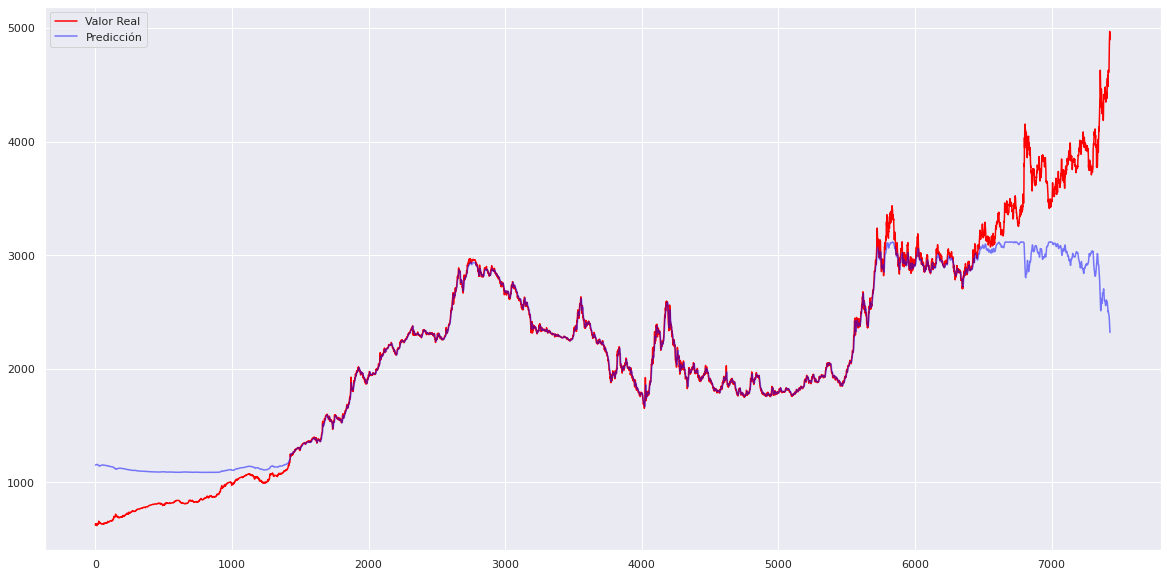

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando SVR
x = df_3['Valor Real']
y = df_3['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

## Vamos a Desarrollar una **Deep Neural Network (DNN)** para resolver este problema de Regresión 

Luego de varias pruebas se definió que la funcion de activación Relu y usar un batch_size bajo influían positivamente en el desempeño de nuestra red.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y_count, test_size=0.2,shuffle=False) #Partiremos nuestro data set con un 20% 
                                                                                              #para entrenamiento y el resto para Test

dnnr = tf.keras.Sequential([ #Creación de la DNN con siete capas intermedias con relu como función de activación 
        tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(350, activation='relu'),
        tf.keras.layers.Dense(300, activation='relu'),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(25, activation='relu'),
        tf.keras.layers.Dense(1),
      ])

dnnr.compile(optimizer=tf.keras.optimizers.Adagrad(),  #Entrenamos nuestra Red con un Adagrad con epochs=100 y batch_size=20 
                loss='mae',                            #Ademas nuestra métrica de evaluación será el mse
                metrics=['mse'])

#Convertimos X_train y y_train en arreglos de Numpy para que puedan ser procesados por nuestra red
X_train = X_train.values 
y_train = np.array(y_train) 
X_test = np.array(X_test) 
#Convertimos nuestro X_test para que pueda ser procesador por nuesta red
X_test = X_test.reshape(X_test.shape[0], 1)
#Convertimos nuestro y_test para que pueda ser procesador por nuesta red
y_test = np.array(y_test)

history = dnnr.fit(X_train, y_train, epochs=100,batch_size=20)
yest = dnnr(X_test)
y_pred = dnnr.predict(X_test)


Epoch 1/100
298/298 [==============================] - 4s 8ms/step - loss: 145.0866 - mse: 207038.7344
Epoch 2/100
298/298 [==============================] - 3s 10ms/step - loss: 16.4958 - mse: 435.4707
Epoch 3/100
298/298 [==============================] - 4s 14ms/step - loss: 12.0595 - mse: 211.5672
Epoch 4/100
298/298 [==============================] - 3s 10ms/step - loss: 9.9928 - mse: 148.0348
Epoch 5/100
298/298 [==============================] - 2s 7ms/step - loss: 8.8099 - mse: 120.7861
Epoch 6/100
298/298 [==============================] - 2s 7ms/step - loss: 7.9272 - mse: 96.5706
Epoch 7/100
298/298 [==============================] - 2s 8ms/step - loss: 7.3818 - mse: 79.0414
Epoch 8/100
298/298 [==============================] - 4s 12ms/step - loss: 6.8325 - mse: 72.7773
Epoch 9/100
298/298 [==============================] - 2s 8ms/step - loss: 6.3961 - mse: 59.0100
Epoch 10/100
298/298 [==============================] - 2s 7ms/step - loss: 6.0274 - mse: 56.6282
Epoch 11/100


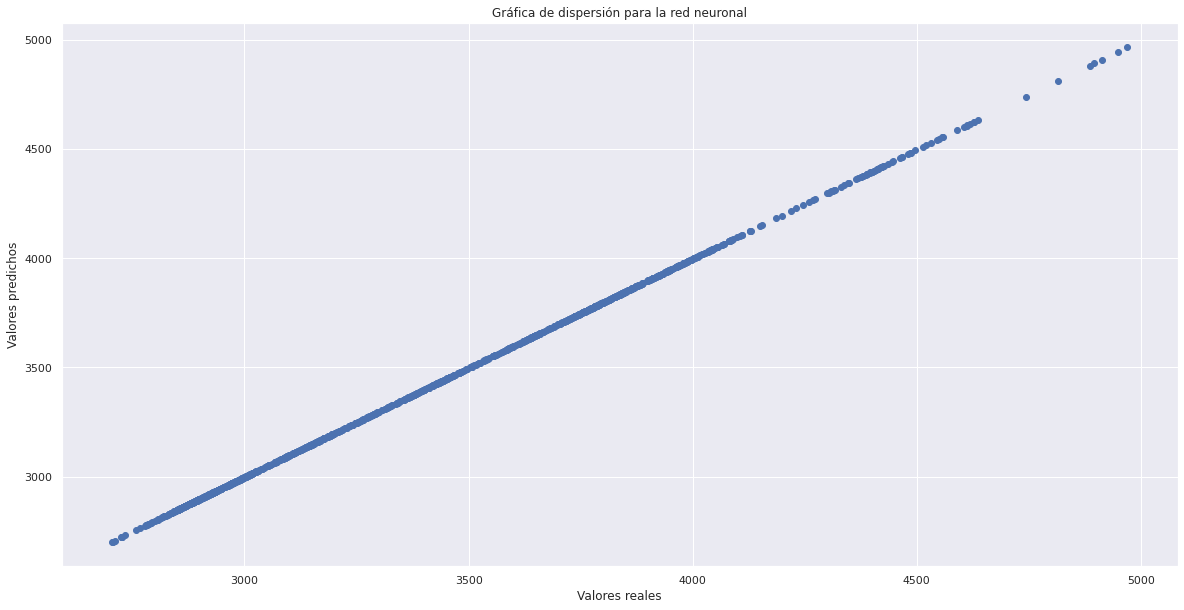

In [ ]:
#@title Grafica de los valores reales vs los valores predecidos
plt.figure(figsize=(20, 10))
plt.scatter(y_test, y_pred)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Gráfica de dispersión para la red neuronal")
plt.show()

## Ahora usaremos las mejores características obtenidas con **Principal Component Analysis (PCA)**

Hemos venido trabajando con características que tienen la siguiente forma:


In [ ]:
x = np.array(sublists) #Caracteristicas que hemos venido usando
print("X shape:",x.shape)

X shape: (7429, 5)


Reduciremos nuestra X a las 3 mejores columnas, de la siguiente manera:

In [ ]:
x = np.array(sublists_2) #Caracteristicas que hemos venido usando
x_2 = PCA(n_components=3).fit_transform(x) #Nuevas característica a usar
print( "shape después del PCA ", x.shape)

shape después del PCA  (7435, 3)


Y repetiremos el proceso de predicción sometiendo nuestro algoritmo a las mismas métricas de evaluacion

In [ ]:
#@title Creación funcion de predicción para regresiones luego del PCA
def prediccion_regresion_afterPCA(lista,regresor):
  predicciones_2 = [] #Creamos una lista de Predicciones
  valor_real_2 = [] #Creamos una lista de Valores reales
  for i in range(lista.size-3*3): #Así recorreremos nuestros valores
   prediction_2 = np.float64(regresor.predict([[lista[i],lista[i+1] , lista[i+2]]])) #Estableceremos 3 valores históricos y realizaremos la predicción
   predicciones_2.append(prediction_2) #Guardamos las predicciones
   valor_real_2.append(lista[i+3]) #Guardamos nuestros valores reales
  return predicciones_2, valor_real_2 

# **Modelos de Regresion**

### 1. Decision Tree Regressor

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados luego del PCA
regressor_TRM = DecisionTreeRegressor()
X_train, X_test, y_train, y_test = train_test_split(x_2, y_count_2, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones4, valor_real4 = prediccion_regresion_afterPCA(lista_2, regresor) #Usaremos la función de predicción para predecir nuestros valores


In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  602.948
RMSE depth split data  24.555
MAE depth split data  15.419


In [ ]:
#@title Lista obtenida de la predicción con Decision Tree luego del PCA
list_of_tuples_4 = list(zip(valor_real4, predicciones4))
df_4 = pd.DataFrame(list_of_tuples_4, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df_4

,Valor Real,Predicción
0,631.51,2509.50
1,627.16,2509.50
2,638.06,2509.50
3,622.92,2509.50
4,627.46,2509.50
...,...,...
7430,4895.29,4895.29
7431,4821.92,4895.29
7432,4819.42,4895.29
7433,4898.74,4895.29


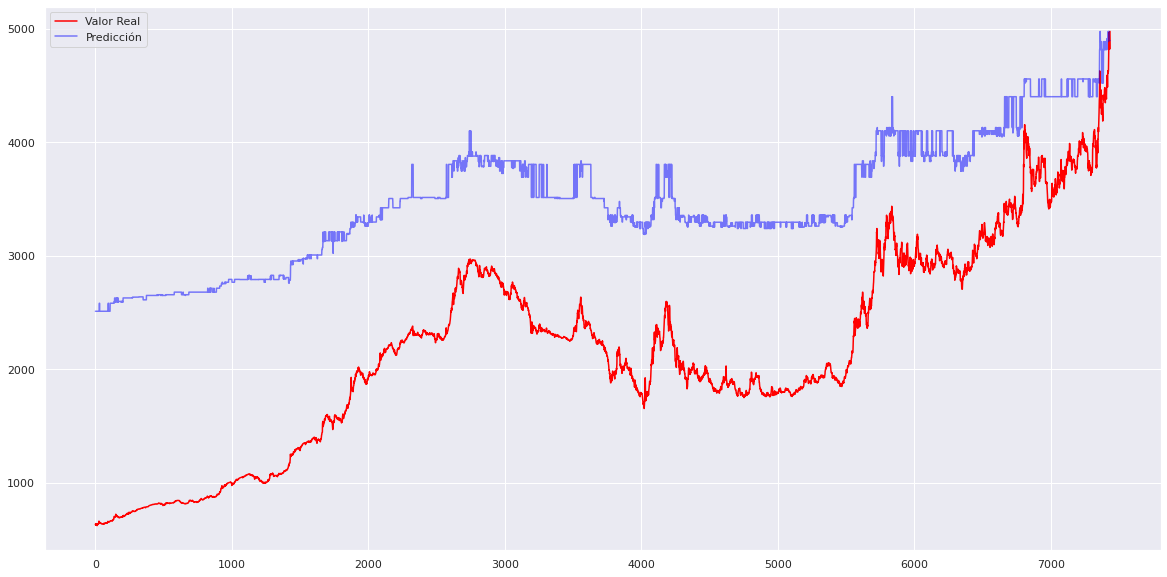

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando Decision Tree luego del PCA

x = df_4['Valor Real']
y = df_4['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

### 1. Random Forest Regressor

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados luego del PCA 
regressor_TRM = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(x_2, y_count_2, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones5, valor_real5 = prediccion_regresion_afterPCA(lista_2, regresor) #Usaremos la función de predicción para predecir nuestros valores


<ipython-input-36-9bd6df24dcab>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data


In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  328.857
RMSE depth split data  18.134
MAE depth split data  11.278


In [ ]:
#@title Lista obtenida de la predicción con Random Forest luego del PCA
list_of_tuples_5 = list(zip(valor_real5, predicciones5))
df_5 = pd.DataFrame(list_of_tuples_5, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df_5

,Valor Real,Predicción
0,631.51,2544.5048
1,627.16,2542.3259
2,638.06,2540.3606
3,622.92,2538.5600
4,627.46,2537.3716
...,...,...
7430,4895.29,4904.9012
7431,4821.92,4904.9012
7432,4819.42,4904.9012
7433,4898.74,4904.9012


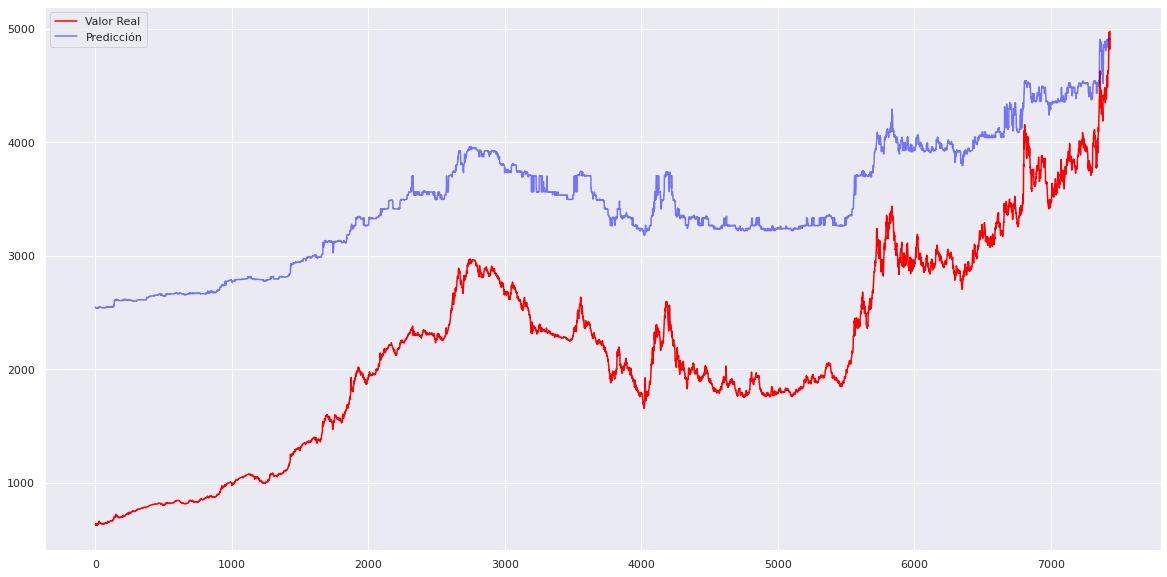

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando Random Forest luego del PCA

x = df_5['Valor Real']
y = df_5['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

### 1. Super Vector Regressor

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados luego del PCA
regressor_TRM = SVR()
X_train, X_test, y_train, y_test = train_test_split(x_2, y_count_2, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones6, valor_real6 = prediccion_regresion_afterPCA(lista_2, regresor) #Usaremos la función de predicción para predecir nuestros valores


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  93782.017
RMSE depth split data  306.238
MAE depth split data  137.656


In [ ]:
#@title Lista obtenida de la predicción con SVR luego del PCA
list_of_tuples_6 = list(zip(valor_real6, predicciones6))
df_6 = pd.DataFrame(list_of_tuples_3, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df_6

,Valor Real,Predicción
0,638.06,1153.077516
1,622.92,1153.661049
2,627.46,1155.463318
3,633.09,1156.376151
4,632.35,1156.209526
...,...,...
7424,4885.50,2418.389802
7425,4913.24,2389.736667
7426,4968.94,2362.614137
7427,4948.14,2335.307589


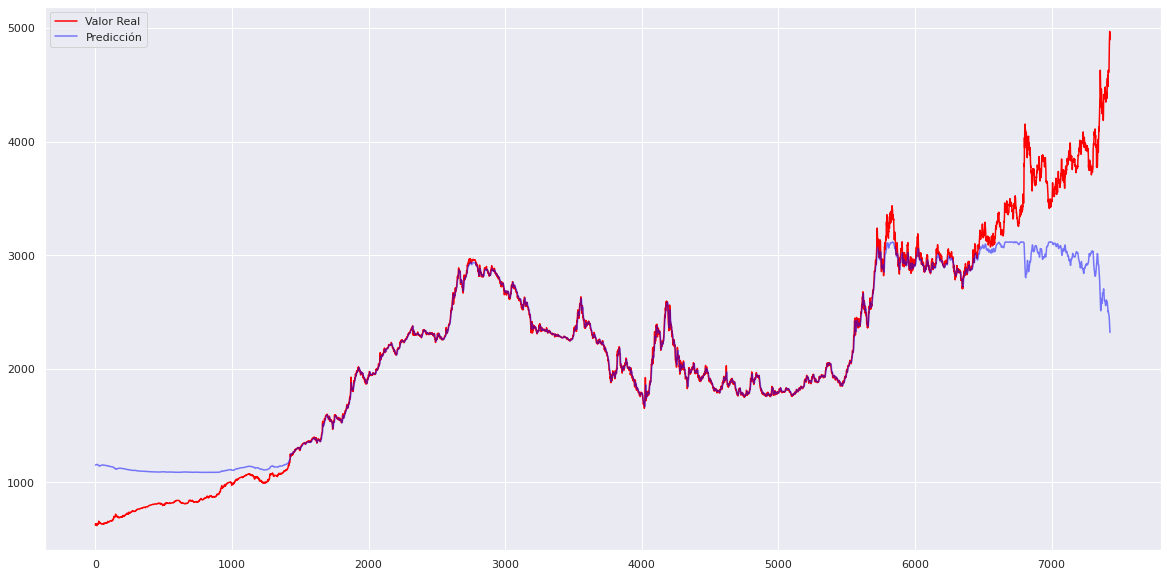

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando SVR luego del PCA

x = df_6['Valor Real']
y = df_6['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

# **Aprendizaje diseñado para todas las Monedas**

Este proyecto tiene como finalidad no solo predecir el valor del dolar americano sino que puede adaptarse a **cualquier moneda extranjera**. A continuación un ejemplo para un dataset con el precio del Euro.




In [ ]:
#@title Data creado con dataset del valor del Euro
data_3 = pd.read_csv('/content/drive/My Drive/ProyectoIA/Data/DatoshistóricosEUR_COP.csv',encoding='cp1252' , sep=";") 
data_3.head(10)

,ï»¿Fecha,Ãšltimo,Apertura,MÃ¡ximo,MÃ­nimo,Vol.,% var.
0,09.02.2011,"2.591,00","2.566,00","2.598,00","2.563,00",NaN,"0,88%"
1,10.02.2011,"2.560,00","2.588,00","2.591,00","2.555,00",NaN,"-1,20%"
2,11.02.2011,"2.556,50","2.557,00","2.563,50","2.540,00",NaN,"-0,14%"
3,14.02.2011,"2.560,50","2.547,00","2.562,50","2.530,00",NaN,"0,16%"
4,15.02.2011,"2.574,50","2.558,00","2.582,50","2.551,00",NaN,"0,55%"
5,16.02.2011,"2.583,00","2.573,00","2.591,00","2.565,00",NaN,"0,33%"
6,17.02.2011,"2.570,50","2.582,00","2.594,50","2.561,00",NaN,"-0,48%"
7,18.02.2011,"2.570,00","2.569,00","2.577,00","2.554,00",NaN,"-0,02%"
8,21.02.2011,"2.565,00","2.569,00","2.573,00","2.558,00",NaN,"-0,19%"
9,22.02.2011,"2.589,00","2.564,00","2.594,00","2.536,00",NaN,"0,94%"


<ipython-input-46-c3dd98ec6105>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_3['Último'] = data_3['Último'].str.replace('.', '').str.replace(',', '.').astype(float)


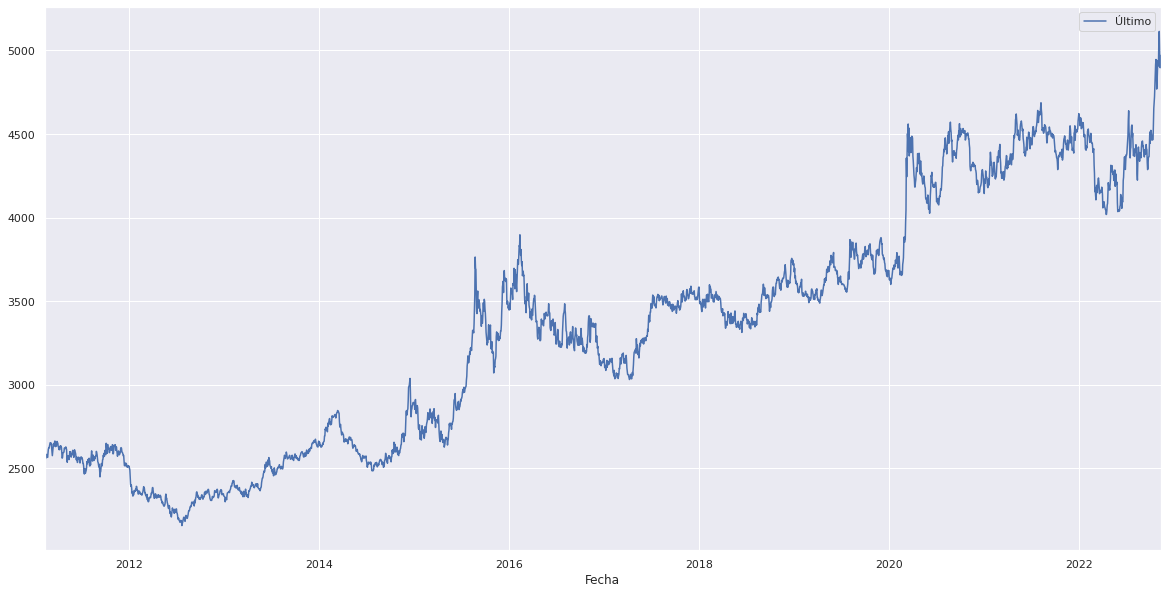

In [ ]:
#@title Modificamos el nombre de algunas columnas para facilitar el proceso
data_3 = data_3.rename(columns={'ï»¿Fecha': 'Fecha', 'Ãšltimo': 'Último'})
#Reemplazamos los valores que tienen comas por puntos decimales 
data_3['Último'] = data_3['Último'].str.replace('.', '').str.replace(',', '.').astype(float)
# Convertimos la columna "fecha" en un objeto de fecha y hora en pandas
data_3['Fecha'] = pd.to_datetime(data_3['Fecha'], format='%d.%m.%Y')
#Ploteamos la data
data_3.plot(x="Fecha", y="Último",figsize=(20, 10))

In [ ]:
#@title **Algoritmo para seleccionar 5 valores anteriores y predecir el 6to**
lista_3 = np.array(data_3["Último"])#Usaremos solo la columna de VALOR de nuestro Dataset
sublists_3 = []
y_count_3 = []
for i in range(lista_3.size-3*5):
  sublist_3 = []
  y_3= []
  
  for j in range(5):
    sublist_3.append(lista_3[i +j])
    
  
  sublists_3.append(np.array(sublist_3))
  y_3.append(lista_3[i+5])
  y_count_3.append(y_3)

In [ ]:
#@title Entrenamiento y prueba con los datos seleccionados
x_3 = np.array(sublists_3) #Definimos nuestras características
regressor_TRM = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(x_3, y_count_3, test_size=0.2, random_state=21) #Partiremos nuestro data set con un 20% para entrenamiento y el resto para Test
regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data 
predicciones7, valor_real7 = prediccion_regresion(lista, regresor) #Usaremos la función de predicción para predecir nuestros valores


<ipython-input-57-95ee82f467f6>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regresor = regressor_TRM.fit(X_train, y_train) #Entrenamos la data


In [ ]:
#@title Evaluación en el rendimiento del modelo
print("MSE depth split data  %.3f"% mean_squared_error(y_test, regresor.predict(X_test))) #Calculamos el MSE para nuestra prediccion
print("RMSE depth split data  %.3f"% np.sqrt(mean_squared_error(y_test, regresor.predict(X_test)))) #Calculamos el RMSE para nuestra prediccion
print("MAE depth split data  %.3f"% mean_absolute_error(y_test, regresor.predict(X_test))) ##Calculamos el MAE para nuestra prediccion

MSE depth split data  980.872
RMSE depth split data  31.319
MAE depth split data  21.802


In [ ]:
#@title Lista obtenida de la predicción con Random Forest
list_of_tuples_7 = list(zip(valor_real7, predicciones7))
df_7 = pd.DataFrame(list_of_tuples_7, columns=['Valor Real', 'Predicción']) #Creamos un DataFrame con las listas obtenidas 
df_7

,Valor Real,Predicción
0,638.06,2174.165
1,622.92,2174.165
2,627.46,2174.165
3,633.09,2174.165
4,632.35,2174.165
...,...,...
7424,4885.50,4829.340
7425,4913.24,4872.540
7426,4968.94,4886.780
7427,4948.14,4891.230


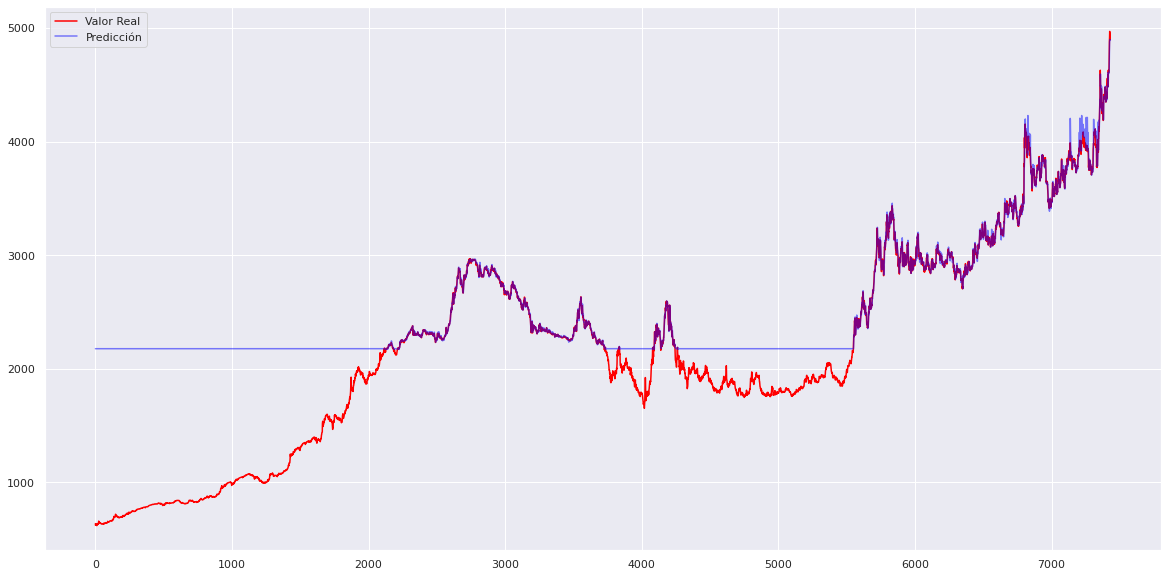

In [ ]:
#@title Gráfica de Predicción vs Valor Esperado usando Random Forest

x = df_7['Valor Real']
y = df_7['Predicción']
plt.figure(figsize =(20, 10))
plt.plot(x, alpha=1, color="red");
plt.plot(y, alpha=0.5, color="blue");
plt.legend(['Valor Real', 'Predicción'])

# **Integrantes**
* Juan Harvey Quintero Olarte
* Jose Daniel Valera Sánchez
* Johan Sebastian Cruz Rueda 

# **Referencias**
[1] TRM Dataset on Kaggle https://www.kaggle.com/datasets/alonsocopete/trm-dolar-cop-colombia https://www.kaggle.com/datasets/mrmorj/big-mac-index-data

[2] Principal Component Analysis: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

[3] Machine Learning: More methods: https://colab.research.google.com/drive/11fMlgW_Se0NPmqJoK0xsDkmm7u8Jb7K6

[4] Non Supervised Learning: https://colab.research.google.com/drive/11Ypx7vjgr3yrmrmFT8bw-PRA8JGO40ki#scrollTo=kp9y0JQfyjw4

[5] Machine Learning: Regression: https://colab.research.google.com/drive/11f3CoCBRoD2IvJC91Pyqe_rsBMCbAddG